From the beginning of this epidemic Novel Coronavirus, I was keeping the close view on the news related to the Characteristics of this pandemic disease. 
The most crucial thing in that disease observed by me while reading several news/blogs and analytical report is that the symptoms are supposed to appear after 10-14 days of getting affected by the COVID -19 virus which makes that disease too much crucial or lethal and the infected person unknowingly play the role of carrier of this virus and get the other person affected through a chain reaction mechanism due to which it can spread in a large area/provenance/state at a quite accelerated rate within a short span of time.
Thus the time is taken by the individual after infection from COVID -19 to appear the symptoms play a major role in spreading this acute disease.
Here my intention is not to create any panic situation, I am just sharing the observation that observed by me while studying and following the news / analytical report related to the COVID-19.

Till I am writing this blog two deaths have been confirmed from this pandemic disease and the number of infected /suspicious cases are increasing exponentially.

In the present weather condition, the common cold/cough or viral fever are quite often in the people of all ages. In everyday life, each and every individual come into the contact of several other individuals, So a common man can not differentiate the patients suffering from a common cold or from COVID -19.
Thus it becomes more essential that we should restrict our movement and lockdown ourselves within our home till the rise of temperature reduces the intensity of spreading of COVID-19 and the concerned ministry/ medical authority may have the buffer period in which they can take essential step to save the life of the Citizens from this pandemic disease.
Here I am sharing some links that would support the above-written statements, kindly go through it read it very carefully and aware the People of INDIA.


# Importing the Libraries

In [1]:
# storing and anaysis
import numpy as np
import pandas as pd

# visualization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import folium

# Updated Dataset

In [2]:
# !ls -lt ../input/corona-virus-report

In [3]:
# importing datasets
full_table = pd.read_csv('../input/corona-virus-report/covid_19_clean_complete.csv', 
                         parse_dates=['Date'])
full_table.head(25)

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered
0,NaN,Thailand,15.0000,101.0000,2020-01-22,2,0,0
1,NaN,Japan,36.0000,138.0000,2020-01-22,2,0,0
2,NaN,Singapore,1.2833,103.8333,2020-01-22,0,0,0
3,NaN,Nepal,28.1667,84.2500,2020-01-22,0,0,0
4,NaN,Malaysia,2.5000,112.5000,2020-01-22,0,0,0
5,British Columbia,Canada,49.2827,-123.1207,2020-01-22,0,0,0
6,New South Wales,Australia,-33.8688,151.2093,2020-01-22,0,0,0
7,Victoria,Australia,-37.8136,144.9631,2020-01-22,0,0,0
8,Queensland,Australia,-28.0167,153.4000,2020-01-22,0,0,0
9,NaN,Cambodia,11.5500,104.9167,2020-01-22,0,0,0


In [4]:
# dataframe info
full_table.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10965 entries, 0 to 10964
Data columns (total 8 columns):
Province/State    5457 non-null object
Country/Region    10965 non-null object
Lat               10965 non-null float64
Long              10965 non-null float64
Date              10965 non-null datetime64[ns]
Confirmed         10965 non-null int64
Deaths            10965 non-null int64
Recovered         10965 non-null int64
dtypes: datetime64[ns](1), float64(2), int64(3), object(2)
memory usage: 685.4+ KB


In [5]:
# checking for missing value
full_table.isna().sum()

Province/State    5508
Country/Region       0
Lat                  0
Long                 0
Date                 0
Confirmed            0
Deaths               0
Recovered            0
dtype: int64

# Data Preprocessing

### Cleaning Data

In [6]:
# replacing Mainland china with just China
full_table['Country/Region'] = full_table['Country/Region'].replace('Mainland China', 'China')

# filling missing values with NA
full_table[['Province/State']] = full_table[['Province/State']].fillna('NA')

### Derived Tables

In [7]:
# cases in the Diamond Princess cruise ship
ship = full_table[full_table['Province/State']=='Diamond Princess cruise ship']
full_table = full_table[full_table['Province/State']!='Diamond Princess cruise ship']

china = full_table[full_table['Country/Region']=='China']
row = full_table[full_table['Country/Region']!='China']

full_latest = full_table[full_table['Date'] == max(full_table['Date'])].reset_index()
china_latest = full_latest[full_latest['Country/Region']=='China']
row_latest = full_latest[full_latest['Country/Region']!='China']

full_latest_grouped = full_latest.groupby('Country/Region')['Confirmed', 'Deaths', 'Recovered'].sum().reset_index()
china_latest_grouped = china_latest.groupby('Province/State')['Confirmed', 'Deaths', 'Recovered'].sum().reset_index()
row_latest_grouped = row_latest.groupby('Country/Region')['Confirmed', 'Deaths', 'Recovered'].sum().reset_index()

# Exploratory Data Analysis (EDA)

## Latest Data

### Current Stats

In [8]:
temp = full_table.groupby('Date')['Confirmed', 'Deaths', 'Recovered'].sum()
temp = temp.reset_index()
temp = temp.sort_values('Date', ascending=False)
temp.head(1).style.background_gradient(cmap='Pastel1')

,Date,Confirmed,Deaths,Recovered
50,2020-03-12 00:00:00,128343,4720,68324


### Complete Data

In [9]:
temp = full_latest.groupby(['Country/Region', 'Province/State'])['Confirmed', 'Deaths', 'Recovered'].max()
temp.style.background_gradient(cmap='Pastel1_r')

### Country Wise Latest Data

In [10]:
temp_f = full_latest_grouped[['Country/Region', 'Confirmed', 'Deaths', 'Recovered']]
temp_f = temp_f.sort_values(by='Confirmed', ascending=False)
temp_f = temp_f.reset_index(drop=True)
temp_f.style.background_gradient(cmap='Pastel1_r')

,Country/Region,Confirmed,Deaths,Recovered
0,China,80932,3172,62901
1,Italy,12462,827,1045
2,Iran,10075,429,2959
3,"Korea, South",7869,66,333
4,France,2284,48,12
5,Spain,2277,55,183
6,Germany,2078,3,25
7,US,1663,40,12
8,Norway,702,0,1
9,Cruise Ship,696,7,325


### Chines Province Wise Latest Data

In [11]:
temp_f = china_latest_grouped[['Province/State', 'Confirmed', 'Deaths', 'Recovered']]
temp_f = temp_f.sort_values(by='Confirmed', ascending=False)
temp_f = temp_f.reset_index(drop=True)
temp_f.style.background_gradient(cmap='Pastel1_r')

,Province/State,Confirmed,Deaths,Recovered
0,Hubei,67781,3056,50318
1,Guangdong,1356,8,1289
2,Henan,1273,22,1249
3,Zhejiang,1215,1,1197
4,Hunan,1018,4,999
5,Anhui,990,6,984
6,Jiangxi,935,1,934
7,Shandong,760,6,734
8,Jiangsu,631,0,629
9,Chongqing,576,6,564


## Map

### Reported cases over the world

In [12]:
# World wide

m = folium.Map(location=[0, 0], tiles='cartodbpositron',
               min_zoom=1, max_zoom=4, zoom_start=1)

for i in range(0, len(full_latest)):
    folium.Circle(
        location=[full_latest.iloc[i]['Lat'], full_latest.iloc[i]['Long']],
        color='crimson', 
        tooltip =   '<li><bold>Country : '+str(full_latest.iloc[i]['Country/Region'])+
                    '<li><bold>Province : '+str(full_latest.iloc[i]['Province/State'])+
                    '<li><bold>Confirmed : '+str(full_latest.iloc[i]['Confirmed'])+
                    '<li><bold>Deaths : '+str(full_latest.iloc[i]['Deaths'])+
                    '<li><bold>Recovered : '+str(full_latest.iloc[i]['Recovered']),
        radius=int(full_latest.iloc[i]['Confirmed'])).add_to(m)
m

### Reported cases in China

In [13]:
# China 

m = folium.Map(location=[30, 116], tiles='cartodbpositron',
               min_zoom=2, max_zoom=5, zoom_start=3)

for i in range(0, len(china_latest)):
    folium.Circle(
        location=[china_latest.iloc[i]['Lat'], china_latest.iloc[i]['Long']],
        color='crimson', 
        tooltip =   '<li><bold>Country : '+str(china_latest.iloc[i]['Country/Region'])+
                    '<li><bold>Province : '+str(china_latest.iloc[i]['Province/State'])+
                    '<li><bold>Confirmed : '+str(china_latest.iloc[i]['Confirmed'])+
                    '<li><bold>Deaths : '+str(china_latest.iloc[i]['Deaths'])+
                    '<li><bold>Recovered : '+str(china_latest.iloc[i]['Recovered']),
        radius=int(china_latest.iloc[i]['Confirmed'])**1).add_to(m)
m

### Cases in differnt Countries

In [14]:
fig = px.choropleth(full_latest_grouped, locations="Country/Region", 
                    locationmode='country names', color="Confirmed", 
                    hover_name="Country/Region", range_color=[1,500], 
                    color_continuous_scale="aggrnyl", 
                    title='Countries with Confirmed Cases')
fig.update(layout_coloraxis_showscale=False)
fig.show()

# ------------------------------------------------------------------------

fig = px.choropleth(full_latest_grouped[full_latest_grouped['Deaths']>0], 
                    locations="Country/Region", locationmode='country names',
                    color="Deaths", hover_name="Country/Region", 
                    range_color=[1,50], color_continuous_scale="agsunset",
                    title='Countries with Deaths Reported')
fig.update(layout_coloraxis_showscale=False)
fig.show()

In [15]:
temp = full_table.groupby(['Country/Region', 'Date'])['Confirmed', 'Deaths', 'Recovered'].sum()
temp = temp.reset_index()
# temp.head()

fig = px.bar(temp, x="Date", y="Confirmed", color='Country/Region', orientation='v', height=600,
             title='Cases', color_discrete_sequence = px.colors.cyclical.mygbm)
fig.show()

fig = px.bar(temp, x="Date", y="Deaths", color='Country/Region', orientation='v', height=600,
             title='Deaths', color_discrete_sequence = px.colors.cyclical.mygbm)
fig.show()

### Spread over the time

In [16]:
formated_gdf = full_table.groupby(['Date', 'Country/Region'])['Confirmed', 'Deaths', 'Recovered'].max()
formated_gdf = formated_gdf.reset_index()
formated_gdf = formated_gdf[formated_gdf['Country/Region']!='China']
formated_gdf['Date'] = pd.to_datetime(formated_gdf['Date'])
formated_gdf['Date'] = formated_gdf['Date'].dt.strftime('%m/%d/%Y')

fig = px.scatter_geo(formated_gdf[formated_gdf['Country/Region']!='China'], 
                     locations="Country/Region", locationmode='country names', 
                     color="Confirmed", size='Confirmed', hover_name="Country/Region", 
                     range_color= [0, max(formated_gdf['Confirmed'])+2], 
                     projection="natural earth", animation_frame="Date", 
                     title='Spread outside China over time')
fig.update(layout_coloraxis_showscale=False)
fig.show()

# -----------------------------------------------------------------------------------

china_map = china.groupby(['Date', 'Province/State'])['Confirmed', 'Deaths', 'Recovered', 
                                                      'Lat', 'Long'].max()
china_map = china_map.reset_index()
china_map['size'] = china_map['Confirmed'].pow(0.5)
china_map['Date'] = pd.to_datetime(china_map['Date'])
china_map['Date'] = china_map['Date'].dt.strftime('%m/%d/%Y')
china_map.head()

fig = px.scatter_geo(china_map, lat='Lat', lon='Long', scope='asia',
                     color="size", size='size', hover_name='Province/State', 
                     hover_data=['Confirmed', 'Deaths', 'Recovered'],
                     projection="natural earth", animation_frame="Date", 
                     title='Spread in China over time')
fig.update(layout_coloraxis_showscale=False)
fig.show()

### Countries with deaths reported

In [17]:
temp_flg = full_latest_grouped[['Country/Region', 'Deaths']]
temp_flg = temp_flg.sort_values(by='Deaths', ascending=False)
temp_flg = temp_flg.reset_index(drop=True)
temp_flg = temp_flg[temp_flg['Deaths']>0]
temp_flg.style.background_gradient(cmap='Pastel1_r')

,Country/Region,Deaths
0,China,3172
1,Italy,827
2,Iran,429
3,"Korea, South",66
4,Spain,55
5,France,48
6,US,40
7,Japan,16
8,Iraq,8
9,United Kingdom,8


### Countries and Provinces with no recovered cases

In [18]:
# Countries with no cases recovered
temp = row_latest_grouped[row_latest_grouped['Recovered']==0]
temp = temp[['Country/Region', 'Confirmed', 'Deaths', 'Recovered']]
temp = temp.sort_values('Confirmed', ascending=False)
temp = temp.reset_index(drop=True)
temp.style.background_gradient(cmap='Pastel1_r')

,Country/Region,Confirmed,Deaths,Recovered
0,Netherlands,503,5,0
1,Qatar,262,0,0
2,Greece,99,1,0
3,Czechia,94,0,0
4,Slovenia,89,0,0
5,San Marino,69,3,0
6,Portugal,59,0,0
7,Brazil,52,0,0
8,Poland,49,1,0
9,Ireland,43,1,0


In [19]:
# Provinces with no cases recovered
temp = china_latest_grouped[china_latest_grouped['Recovered']==0]
temp = temp[['Province/State', 'Confirmed', 'Deaths', 'Recovered']]
temp = temp.sort_values('Confirmed', ascending=False)
temp = temp.reset_index(drop=True)
temp.style.background_gradient(cmap='Pastel1_r')

,Province/State,Confirmed,Deaths,Recovered


### Countries and Provinces with no affected case anymore

In [20]:
temp = row_latest_grouped[row_latest_grouped['Confirmed']==
                          row_latest_grouped['Deaths']+
                          row_latest_grouped['Recovered']]
temp = temp[['Country/Region', 'Confirmed', 'Deaths', 'Recovered']]
temp = temp.sort_values('Confirmed', ascending=False)
temp = temp.reset_index(drop=True)
temp.style.background_gradient(cmap='Greens')

,Country/Region,Confirmed,Deaths,Recovered
0,Andorra,1,0,1
1,Guyana,1,1,0
2,Nepal,1,0,1


In [21]:
temp = china_latest_grouped[china_latest_grouped['Confirmed']==
                          china_latest_grouped['Deaths']+
                          china_latest_grouped['Recovered']]
temp = temp[['Province/State', 'Confirmed', 'Deaths', 'Recovered']]
temp = temp.sort_values('Confirmed', ascending=False)
temp = temp.reset_index(drop=True)
temp.style.background_gradient(cmap='Greens')

,Province/State,Confirmed,Deaths,Recovered
0,Anhui,990,6,984
1,Jiangxi,935,1,934
2,Fujian,296,1,295
3,Xinjiang,76,3,73
4,Qinghai,18,0,18
5,Macau,10,0,10
6,Tibet,1,0,1


### Countries and Provinces with all the cases recovered

In [22]:
temp = row_latest_grouped[row_latest_grouped['Confirmed']==
                          row_latest_grouped['Recovered']]
temp = temp[['Country/Region', 'Confirmed', 'Recovered']]
temp = temp.sort_values('Confirmed', ascending=False)
temp = temp.reset_index(drop=True)
temp.style.background_gradient(cmap='Greens')

,Country/Region,Confirmed,Recovered
0,Andorra,1,1
1,Nepal,1,1


In [23]:
temp = china_latest_grouped[china_latest_grouped['Confirmed']==
                          china_latest_grouped['Recovered']]
temp = temp[['Province/State', 'Confirmed', 'Recovered']]
temp = temp.sort_values('Confirmed', ascending=False)
temp = temp.reset_index(drop=True)
temp.style.background_gradient(cmap='Greens')

,Province/State,Confirmed,Recovered
0,Qinghai,18,18
1,Macau,10,10
2,Tibet,1,1


### Diamond Princess Cruise ship Status

In [24]:
# Cases in the Diamond Princess Cruise Ship
temp = ship.sort_values(by='Date', ascending=False).head(1)
temp = temp[['Province/State', 'Confirmed', 'Deaths', 'Recovered']].reset_index(drop=True)
temp.style.background_gradient(cmap='rainbow')

,Province/State,Confirmed,Deaths,Recovered


In [25]:
temp = ship[ship['Date'] == max(ship['Date'])].reset_index()

m = folium.Map(location=[35.4437, 139.638], tiles='cartodbpositron',
               min_zoom=8, max_zoom=12, zoom_start=10)

folium.Circle(location=[temp.iloc[0]['Lat'], temp.iloc[0]['Long']],
        color='crimson', 
        tooltip =   '<li><bold>Ship : '+str(temp.iloc[0]['Province/State'])+
                    '<li><bold>Confirmed : '+str(temp.iloc[0]['Confirmed'])+
                    '<li><bold>Deaths : '+str(temp.iloc[0]['Deaths'])+
                    '<li><bold>Recovered : '+str(temp.iloc[0]['Recovered']),
        radius=int(temp.iloc[0]['Confirmed'])**1).add_to(m)
m

ValueError: max() arg is an empty sequence

* The Diamond Princess cruise ship was carrying 3,711 passengers and crew on board
* Ship arrived in Yokohama, near Tokyo, on February 3
* [https://www.princess.com/news/notices_and_advisories/notices/diamond-princess-update.html](https://www.princess.com/news/notices_and_advisories/notices/diamond-princess-update.html)

## Hubei - China - World

In [26]:
def location(row):
    if row['Country/Region']=='China':
        if row['Province/State']=='Hubei':
            return 'Hubei'
        else:
            return 'Other Chinese Provinces'
    else:
        return 'Rest of the World'

temp = full_latest.copy()
temp['Region'] = temp.apply(location, axis=1)
temp = temp.groupby('Region')['Confirmed', 'Deaths', 'Recovered'].sum().reset_index()
temp = temp.melt(id_vars='Region', value_vars=['Confirmed', 'Deaths', 'Recovered'], 
                 var_name='Case', value_name='Count').sort_values('Count')
temp.head()

fig = px.bar(temp, y='Region', x='Count', color='Case', barmode='group', orientation='h',
             text='Count', title='Hubei - China - World', 
             color_discrete_sequence= ['#EF553B', '#00CC96', '#636EFA'])
fig.update_traces(textposition='outside')
fig.update_layout(uniformtext_minsize=8, uniformtext_mode='hide')
fig.show()

# Number of new cases everyday

In [27]:
# In China
temp = china.groupby('Date')['Confirmed', 'Deaths', 'Recovered'].sum().diff()
temp = temp.reset_index()
temp = temp.melt(id_vars="Date", 
                 value_vars=['Confirmed', 'Deaths', 'Recovered'])

fig = px.bar(temp, x="Date", y="value", color='variable', 
             title='Number of new cases in China everyday')
fig.update_layout(barmode='group')
fig.show()

#-----------------------------------------------------------------------------

# ROW
temp = row.groupby('Date')['Confirmed', 'Deaths', 'Recovered'].sum().diff()
temp = temp.reset_index()
temp = temp.melt(id_vars="Date", 
                 value_vars=['Confirmed', 'Deaths', 'Recovered'])

fig = px.bar(temp, x="Date", y="value", color='variable', 
             title='Number of new cases outside China everyday')
fig.update_layout(barmode='group')
fig.show()

## Number of Cases

In [28]:
gdf = gdf = full_table.groupby(['Date', 'Country/Region'])['Confirmed', 'Deaths', 'Recovered'].max()
gdf = gdf.reset_index()

temp = gdf[gdf['Country/Region']=='China'].reset_index()
temp = temp.melt(id_vars='Date', value_vars=['Confirmed', 'Deaths', 'Recovered'],
                var_name='Case', value_name='Count')
fig = px.bar(temp, x="Date", y="Count", color='Case', facet_col="Case",
            title='Cases in China')
fig.show()

temp = gdf[gdf['Country/Region']!='China'].groupby('Date').sum().reset_index()
temp = temp.melt(id_vars='Date', value_vars=['Confirmed', 'Deaths', 'Recovered'],
                var_name='Case', value_name='Count')
fig = px.bar(temp, x="Date", y="Count", color='Case', facet_col="Case",
             title='Cases Outside China')
fig.show()

## Number of Places to which COVID-19 Spread

In [29]:
c_spread = china[china['Confirmed']!=0].groupby('Date')['Province/State'].unique().apply(len)
c_spread = pd.DataFrame(c_spread).reset_index()

fig = px.line(c_spread, x='Date', y='Province/State', 
              title='Number of Provinces/States/Regions of China to which COVID-19 spread over the time')
fig.show()

# ------------------------------------------------------------------------------------------

spread = full_table[full_table['Confirmed']!=0].groupby('Date')['Country/Region'].unique().apply(len)
spread = pd.DataFrame(spread).reset_index()

fig = px.line(spread, x='Date', y='Country/Region', 
              title='Number of Countries/Regions to which COVID-19 spread over the time')
fig.show()

* COVID-19 spread to all the provinces of the China really fast and early
* Number of countries to which COVID-19 spread hasn't increased that much after first few weeks

## Recovery and Mortality Rate Over The Time

In [30]:
temp = full_table.groupby('Date').sum().reset_index()
temp.head()

# adding two more columns
temp['No. of Deaths to 100 Confirmed Cases'] = round(temp['Deaths']/
                                                     temp['Confirmed'], 3)*100
temp['No. of Recovered to 100 Confirmed Cases'] = round(temp['Recovered']/
                                                        temp['Confirmed'], 3)*100
temp['No. of Recovered to 1 Death Case'] = round(temp['Recovered']/
                                                 temp['Deaths'], 3)

temp = temp.melt(id_vars='Date', 
                 value_vars=['No. of Deaths to 100 Confirmed Cases', 
                             'No. of Recovered to 100 Confirmed Cases', 
                             'No. of Recovered to 1 Death Case'], 
                 var_name='Ratio', 
                 value_name='Value')

fig = px.line(temp, x="Date", y="Value", color='Ratio', 
              title='Recovery and Mortality Rate Over The Time')
fig.show()

* During the first few weeks the there were more Deaths reported per day than Recoverd cases
* Over the time that has changed drastically
* Although the death rate hasn't come down, the number of recovered cases has defenitly increased

## Proportion of Cases

In [31]:
rl = row_latest.groupby('Country/Region')['Confirmed', 'Deaths', 'Recovered'].sum()
rl = rl.reset_index().sort_values(by='Confirmed', ascending=False).reset_index(drop=True)
rl.head().style.background_gradient(cmap='rainbow')

ncl = rl.copy()
ncl['Affected'] = ncl['Confirmed'] - ncl['Deaths'] - ncl['Recovered']
ncl = ncl.melt(id_vars="Country/Region", value_vars=['Affected', 'Recovered', 'Deaths'])

fig = px.bar(ncl.sort_values(['variable', 'value']), 
             x="Country/Region", y="value", color='variable', orientation='v', height=800,
             # height=600, width=1000,
             title='Number of Cases outside China')
fig.update_layout(uniformtext_minsize=8, uniformtext_mode='hide')
fig.show()

# ------------------------------------------

cl = china_latest.groupby('Province/State')['Confirmed', 'Deaths', 'Recovered'].sum()
cl = cl.reset_index().sort_values(by='Confirmed', ascending=False).reset_index(drop=True)
# cl.head().style.background_gradient(cmap='rainbow')

ncl = cl.copy()
ncl['Affected'] = ncl['Confirmed'] - ncl['Deaths'] - ncl['Recovered']
ncl = ncl.melt(id_vars="Province/State", value_vars=['Affected', 'Recovered', 'Deaths'])

fig = px.bar(ncl.sort_values(['variable', 'value']), 
             y="Province/State", x="value", color='variable', orientation='h', height=800,
             # height=600, width=1000,
             title='Number of Cases in China')
fig.update_layout(uniformtext_minsize=8, uniformtext_mode='hide')
fig.show()

In [32]:
fig = px.treemap(china_latest.sort_values(by='Confirmed', ascending=False).reset_index(drop=True), 
                 path=["Province/State"], values="Confirmed", 
                 title='Number of Confirmed Cases in Chinese Provinces',
                 color_discrete_sequence = px.colors.qualitative.Prism)
fig.show()

fig = px.treemap(china_latest.sort_values(by='Deaths', ascending=False).reset_index(drop=True), 
                 path=["Province/State"], values="Deaths", 
                 title='Number of Deaths Reported in Chinese Provinces',
                 color_discrete_sequence = px.colors.qualitative.Prism)
fig.show()

fig = px.treemap(china_latest.sort_values(by='Recovered', ascending=False).reset_index(drop=True), 
                 path=["Province/State"], values="Recovered", 
                 title='Number of Recovered Cases in Chinese Provinces',
                 color_discrete_sequence = px.colors.qualitative.Prism)
fig.show()

# ----------------------------------------------------------------------------

fig = px.treemap(row_latest, path=["Country/Region"], values="Confirmed", 
                 title='Number of Confirmed Cases outside china',
                 color_discrete_sequence = px.colors.qualitative.Pastel)
fig.show()

fig = px.treemap(row_latest, path=["Country/Region"], values="Deaths", 
                 title='Number of Deaths outside china',
                 color_discrete_sequence = px.colors.qualitative.Pastel)
fig.show()

fig = px.treemap(row_latest, path=["Country/Region"], values="Recovered", 
                 title='Number of Recovered Cases outside china',
                 color_discrete_sequence = px.colors.qualitative.Pastel)
fig.show()

In [33]:
temp = full_table.groupby(['Country/Region', 'Date', ])['Confirmed', 'Deaths', 'Recovered']
temp = temp.sum().diff().reset_index()

mask = temp['Country/Region'] != temp['Country/Region'].shift(1)

temp.loc[mask, 'Confirmed'] = np.nan
temp.loc[mask, 'Deaths'] = np.nan
temp.loc[mask, 'Recovered'] = np.nan

fig = px.bar(temp, x="Date", y="Confirmed", color='Country/Region',
             title='Number of new cases everyday')
fig.show()

fig = px.bar(temp[temp['Country/Region']!='China'], x="Date", y="Confirmed", color='Country/Region',
             title='Number of new cases outside China everyday')
fig.show()

fig = px.bar(temp, x="Date", y="Deaths", color='Country/Region',
             title='Number of new death case reported outside China everyday')
fig.show()

fig = px.bar(temp[temp['Country/Region']!='China'], x="Date", y="Deaths", color='Country/Region',
             title='Number of new death case reported outside China everyday')
fig.show()

# Comparison With other Epidemics

In [34]:
epidemics = pd.DataFrame({
    'epidemic' : ['COVID-19', 'SARS', 'EBOLA', 'MERS', 'H1N1'],
    'start_year' : [2019, 2003, 2014, 2012, 2009],
    'end_year' : [2020, 2004, 2016, 2017, 2010],
    'confirmed' : [80000, 8096, 28646, 2494, 6724149],
    'deaths' : [2750, 774, 11323, 858, 19654]
})

epidemics['mortality'] = round((epidemics['deaths']/epidemics['confirmed'])*100, 2)

epidemics.head()

,epidemic,start_year,end_year,confirmed,deaths,mortality
0,COVID-19,2019,2020,80000,2750,3.44
1,SARS,2003,2004,8096,774,9.56
2,EBOLA,2014,2016,28646,11323,39.53
3,MERS,2012,2017,2494,858,34.40
4,H1N1,2009,2010,6724149,19654,0.29


In [35]:
temp = epidemics.melt(id_vars='epidemic', value_vars=['confirmed', 'deaths', 'mortality'],
                      var_name='Case', value_name='Value')

fig = px.bar(temp, x="epidemic", y="Value", color='epidemic', text='Value', facet_col="Case",
             color_discrete_sequence = px.colors.qualitative.Bold)
fig.update_traces(textposition='outside')
fig.update_layout(uniformtext_minsize=8, uniformtext_mode='hide')
fig.update_yaxes(showticklabels=False)
fig.layout.yaxis2.update(matches=None)
fig.layout.yaxis3.update(matches=None)
fig.show()

In [36]:
fig = px.scatter(epidemics, x='start_year', y = [1 for i in range(len(epidemics))], 
                 size='confirmed', color='epidemic', title='Confirmed Cases',
                 color_discrete_sequence = px.colors.qualitative.Bold)
fig.update_yaxes(showticklabels=False)
fig.show()

fig = px.scatter(epidemics, x='start_year', y = [1 for i in range(len(epidemics))], 
                 size='deaths', color='epidemic', title='Deaths',
                 color_discrete_sequence = px.colors.qualitative.Bold)
fig.update_yaxes(showticklabels=False)
fig.show()

/opt/conda/lib/python3.6/site-packages/pandas/plotting/_matplotlib/converter.py:103: FutureWarning:

Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()



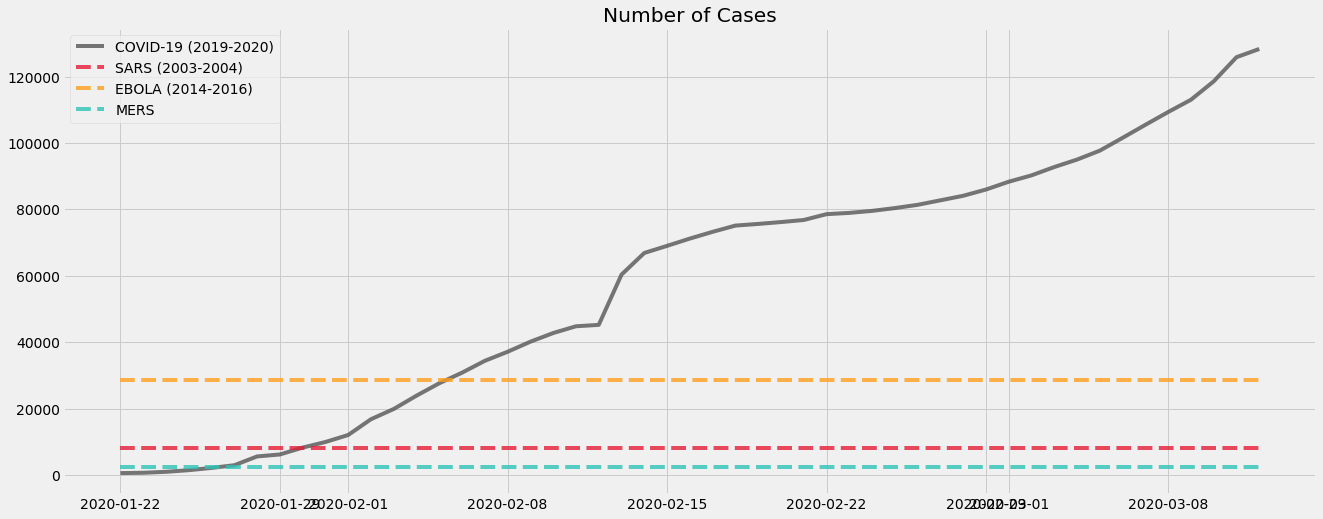

In [37]:
temp = full_table.groupby('Date')['Confirmed'].sum().reset_index()

covid = temp['Confirmed']
sars = [8096 for i in range(len(temp))]
ebola = [28646 for i in range(len(temp))]
mers = [2494 for i in range(len(temp))]
h1n1 = [6724149 for i in range(len(temp))]

plt.style.use('fivethirtyeight')
plt.figure(figsize=(20, 8))
ax = plt.plot(temp['Date'], covid, label='COVID-19 (2019-2020)', c='#555555', alpha=0.8)
ax = plt.plot(temp['Date'], sars, label='SARS (2003-2004)', c='#E71D36', ls='--', alpha=0.8)
ax = plt.plot(temp['Date'], ebola, label='EBOLA (2014-2016)', c='#FF9F1C', ls='--', alpha=0.8)
ax = plt.plot(temp['Date'], mers, label='MERS', c='#2EC4B6', ls='--', alpha=0.8)
plt.title('Number of Cases')
plt.legend()
plt.show()

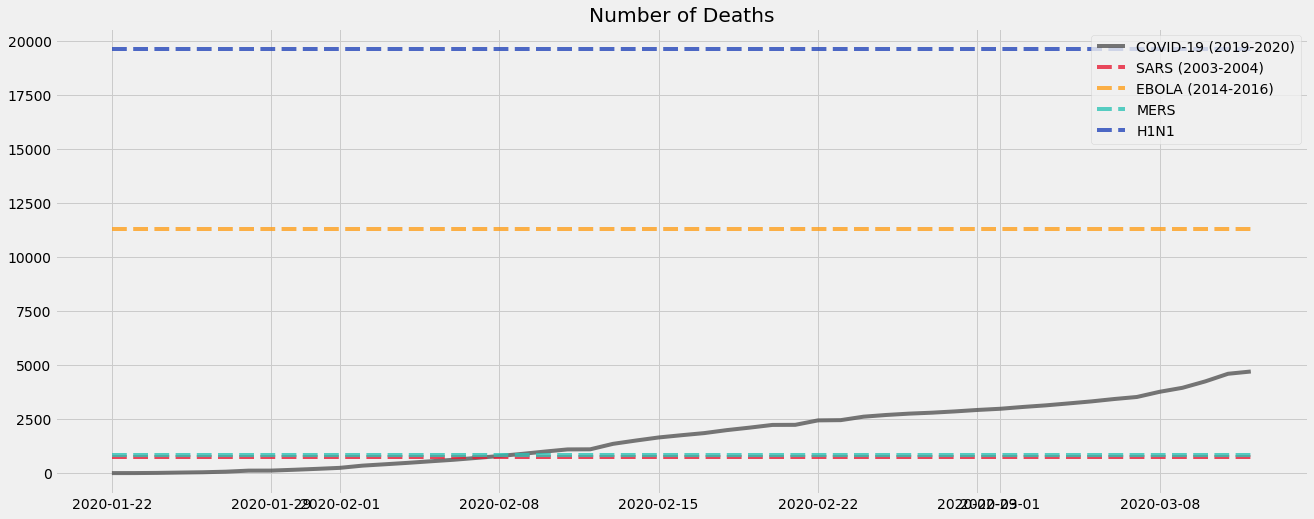

In [38]:
temp = full_table.groupby('Date')['Deaths'].sum().reset_index()

covid = temp['Deaths']
sars = [774 for i in range(len(temp))]
ebola = [11323 for i in range(len(temp))]
mers = [858 for i in range(len(temp))]
h1n1 = [19654 for i in range(len(temp))]

plt.figure(figsize=(20, 8))
ax = plt.plot(temp['Date'], covid, label='COVID-19 (2019-2020)', c='#555555', alpha=0.8)
ax = plt.plot(temp['Date'], sars, label='SARS (2003-2004)', c='#E71D36', ls='--', alpha=0.8)
ax = plt.plot(temp['Date'], ebola, label='EBOLA (2014-2016)', c='#FF9F1C', ls='--', alpha=0.8)
ax = plt.plot(temp['Date'], mers, label='MERS', c='#2EC4B6', ls='--', alpha=0.8)
ax = plt.plot(temp['Date'], h1n1, label='H1N1', c='#2345BA', ls='--', alpha=0.8)
plt.title('Number of Deaths')
plt.legend()
plt.show()